In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
fname = "200623//200623_Bi2Te30617_seebeck_1.txt"
df = pd.read_csv(fname, sep = " ", header = 0)

In [3]:
df.head()

,Date,Time,RTDl,RTDr,Vsamp
0,2020-06-23,10:51:56.802042,1090.29149,1090.47412,0.000003
1,2020-06-23,10:51:56.889047,1090.29024,1090.47397,0.000003
2,2020-06-23,10:51:56.974052,1090.28847,1090.47345,0.000003
3,2020-06-23,10:51:57.043056,1090.29068,1090.47537,0.000003
4,2020-06-23,10:51:57.113060,1090.29245,1090.47603,0.000003


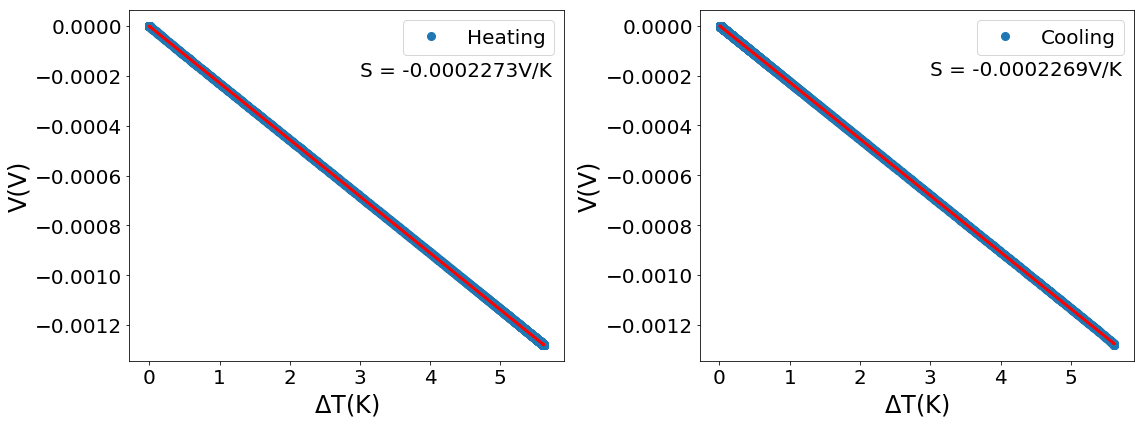

In [7]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
dTl = df['Tl'] - df['Tl'].iloc[0]
dTr = df['Tr'] - df['Tr'].iloc[0]
df['dVsamp'] = df['Vsamp'] - df['Vsamp'].iloc[0]
df['delT'] = dTl - dTr

fig, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24


mask = df['dVsamp'].idxmin()
x = df['delT'][0 : mask]
y = df['dVsamp'][0 : mask]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(3, -0.0002, f'S = {round(m1,7)}V/K', fontsize = 20)
axs[0].set_xlabel(r'$\Delta$T(K)', fontsize = fz)
axs[0].set_ylabel('V(V)', fontsize = fz)
axs[0].tick_params(labelsize = 20)
axs[0].legend(fontsize = 20)

x = df['delT'][mask:]
y = df['dVsamp'][mask:]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(x, np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(3, -0.0002, f'S = {round(m2,7)}V/K', fontsize = 20)
axs[1].set_xlabel(r'$\Delta$T(K)', fontsize = fz)
axs[1].set_ylabel('V(V)', fontsize = fz)
axs[1].tick_params(labelsize=20)
axs[1].legend(fontsize = 20)

plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 300)

In [19]:
fname = "200708//200708_Bi2Te3_p2_seebeck_2.txt"
df = pd.read_csv(fname, sep = " ", header = 0)
df.head()

,Date,Time,RTDl,RTDr,Vsamp
0,2020-07-08,13:50:01.093378,1092.06452,1092.26208,0.000002
1,2020-07-08,13:50:01.166383,1092.06559,1092.26274,0.000002
2,2020-07-08,13:50:01.229386,1092.06569,1092.26223,0.000003
3,2020-07-08,13:50:01.304390,1092.06631,1092.26392,0.000003
4,2020-07-08,13:50:01.379395,1092.06591,1092.26385,0.000003


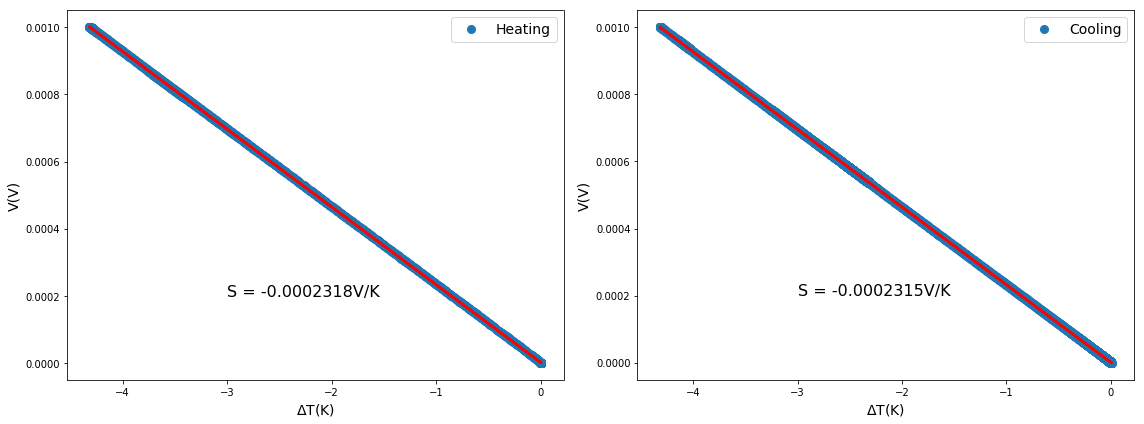

In [23]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
dTl = df['Tl'] - df['Tl'].iloc[0]
dTr = df['Tr'] - df['Tr'].iloc[0]
df['dVsamp'] = df['Vsamp'] - df['Vsamp'].iloc[0]
df['delT'] = dTl - dTr

fig, axs = plt.subplots(1,2, figsize = (16,6))
mask = df['dVsamp'].idxmax()
x = df['delT'][0 : mask]
y = df['dVsamp'][0 : mask]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(x, np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(-3, 0.0002, f'S = {round(m1,7)}V/K', fontsize = 16)
axs[0].set_xlabel(r'$\Delta$T(K)', fontsize = 14)
axs[0].set_ylabel('V(V)', fontsize = 14)
axs[0].legend(fontsize = 14)

x = df['delT'][mask:]
y = df['dVsamp'][mask:]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(x, y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(x, np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(-3, 0.0002, f'S = {round(m2,7)}V/K', fontsize = 16)
axs[1].set_xlabel(r'$\Delta$T(K)', fontsize = 14)
axs[1].set_ylabel('V(V)', fontsize = 14)
axs[1].legend(fontsize = 14)

plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 300)